In [15]:
#from __future__ import division
import numpy as np

def init_lattice(n):

    '''Create a nxn lattice with random spin configuration'''
    
    lattice = np.random.choice([1, -1], size=(n, n))
    return lattice


def deltaE(S0, Sn, J, H):

    '''Energy difference for a spin flip'''
    
    return 2 * S0 * (H + J * Sn)


def ising(n=200, 
          nsteps=500000,
          H=0,
          J=1,
          T=1,
          count_spins = False,
          countij = [1,1],
          correlation=False,
          corr_ij=[0,0],
          corr_r=1):

    '''Ising Model Simulator. If count_spins = True, only flipping behavior of 1 site is studied.'''
    
    lattice = init_lattice(n)
    energy = 0
    energies = []
    spins = []
    spin = np.sum(lattice)
    icount, jcount = countij
    counted_spins = [lattice[icount, jcount]]
    counted_intervals = []
    icorr, jcorr = corr_ij
    Sis = []
    SiSjs = []
    
    for step in range(nsteps):

        i = np.random.randint(n)
        j = np.random.randint(n)

        # Periodic Boundary Condition
        Sn = lattice[(i - 1) % n, j] + lattice[(i + 1) % n, j] + \
             lattice[i, (j - 1) % n] + lattice[i, (j + 1) % n]

        dE = deltaE(lattice[i, j], Sn, J, H)

        if dE < 0 or np.random.random() < np.exp(-dE/T):
            lattice[i, j] = -lattice[i, j]
            energy += dE
            energies.append(energy)
         # Note that the spin is collected at every step
            spin += 2*lattice[i, j]
        
        if count_spins:
            ispin = lattice[icount, jcount]
            if ispin != counted_spins[-1]:
                counted_spins.append(ispin)
                counted_interval = step - sum(counted_intervals)

                counted_intervals.append(counted_interval)
        if correlation:
            Sn_corr = lattice[(icorr - corr_r) % n, jcorr] + lattice[(icorr + corr_r) % n, jcorr] + \
                      lattice[icorr, (jcorr - corr_r) % n] + lattice[icorr, (jcorr + corr_r) % n]
            Si = lattice[icorr, jcorr]
            SiSj = Si * Sn_corr / 4.0
            Sis.append(Si)
            SiSjs.append(SiSj)
            
        spins.append(spin)


    if correlation:
        return Sis, SiSjs
    
    if count_spins:
        return counted_spins, counted_intervals
        
    return lattice, energies, spins
    

def ising1000(n=100, nsteps=1000000, H=0, J=1, T=1):

    '''Ising Model Simulator. Special case for very large lattices.
    To reduce some memory usage:
    spin is added to the array every 1000 steps.
    Energies are not returned.
    Still pretty inefficient!
    '''
    
    lattice = init_lattice(n)
    energy = 0

    spins = []
    spin = np.sum(lattice)
    for istep, step in enumerate(range(nsteps)):

        i = np.random.randint(n)
        j = np.random.randint(n)

        # Periodic Boundary Condition
        Sn = lattice[(i - 1) % n, j] + lattice[(i + 1) % n, j] + \
             lattice[i, (j - 1) % n] + lattice[i, (j + 1) % n]

        dE = deltaE(lattice[i, j], Sn, J, H)

        if dE < 0 or np.random.random() < np.exp(-dE/T):
            lattice[i, j] = -lattice[i, j]
            energy += dE
            spin += 2*lattice[i, j]
        if istep % 100 == 0:
            spins.append(spin)
    return lattice, spins


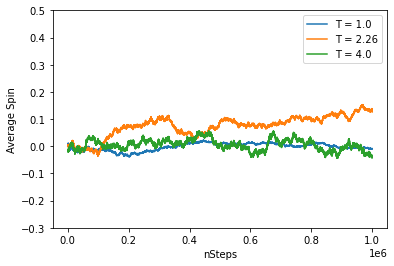

In [18]:
import matplotlib.pyplot as plt

temperatures = [1.0, 2.26, 4.0]

for T in temperatures:

    lattice, energies, spins = ising(n=100, nsteps = 1000000, T=T)
    spins = np.array(spins) / 100. ** 2
    plt.plot(range(len(spins)), spins, label = 'T = {0}'.format(T))
plt.legend(loc = 'best')
plt.xlabel('nSteps')
plt.ylabel('Average Spin')
plt.ylim(-0.3, 0.5)
#plt.savefig('Pictures/average-spin2.png')
plt.show()


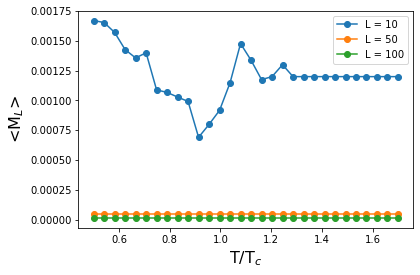

In [13]:
from __future__ import division
import matplotlib.pyplot as plt
import os

Ns = [10, 50, 100]  # System Size
T_Tcs = np.linspace(0.5, 1.7, 30)  # T/Tc
Tc = 2.268  # Onsager's Tc

for n in Ns:
    avgspins = []
    for i, T_Tc in enumerate(T_Tcs):
        T = T_Tc*Tc
        #indices, spins = np.loadtxt('magnetization/size-{0}/temp-{1}/temp-{1}.out'.format(n,i), unpack =True)
        spins = spins[int(len(spins)/2):]
        avgspin = np.sum(np.abs(spins)) / n ** 2 / len(spins)
        avgspins.append(avgspin)
    plt.plot(T_Tcs, avgspins, 'o-', label = 'L = {0}'.format(n))

plt.xlabel('T/T$_{c}$', fontsize = 16)
plt.ylabel('<M$_{L}$>', fontsize = 16)
plt.legend()
#plt.savefig('Pictures/magnetization2.png')
plt.show()

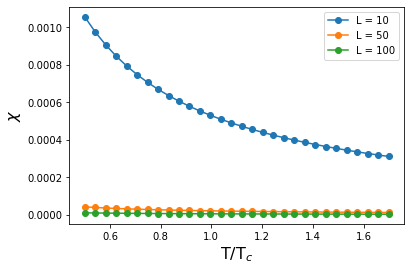

In [14]:
from __future__ import division
import matplotlib.pyplot as plt
#from ising import *
#import os

Ns = [10, 50, 100]  # System Size
T_Tcs = np.linspace(0.5, 1.7, 30)  # T/Tc
Tc = 2.268  # Onsager's Tc

for n in Ns:
    avgspins = []
    Xs = []
    for i, T_Tc in enumerate(T_Tcs):
        T = T_Tc*Tc
        #indices, spins = np.loadtxt('magnetization/size-{0}/temp-{1}/temp-{1}.out'.format(n,i), unpack =True)
        spins = spins[int(len(spins)/2):]
        avgspin = np.sum(np.abs(spins)) / n ** 2 / len(spins)
        X =  np.abs(np.sum(((np.abs(spins) / n ** 2) ** 2)) \
                    / len(spins) - avgspin) / T
        avgspins.append(avgspin)
        Xs.append(X)
    plt.plot(T_Tcs, Xs, 'o-', label = 'L = {0}'.format(n))
plt.xlabel('T/T$_{c}$', fontsize = 16)
plt.ylabel('$\chi$', fontsize = 16)
plt.legend()
#plt.savefig('Pictures/susseptibility1.png')
plt.show()